In [ ]:
pip install pandas sdv openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [ ]:
import pandas as pd

# Load Excel file
data = pd.read_excel("default of credit card clients.xls", header=1)

# Drop ID column if it exists
data = data.drop(columns=['ID'], errors='ignore')

print(data.shape)
data.head()


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

# Optional: You can review the inferred metadata
# metadata.to_dict()


In [ ]:
from sdv.single_table import TVAESynthesizer

# Initialize synthesizer
tvae = TVAESynthesizer(metadata)

# Fit model on real data
tvae.fit(data)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# Generate synthetic samples (same size as original)
synthetic_data = tvae.sample(num_rows=len(data))

# Preview
print(synthetic_data.shape)
synthetic_data.head()


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,69547,2,2,2,25,0,0,0,0,0,...,13789,23200,37325,2334,6502,4016,1823,2986,2479,0
1,51880,2,1,2,26,-2,-2,-2,-2,-2,...,1727,660,-697,0,0,105,131,0,167,0
2,76043,2,1,2,33,-1,-1,-1,-1,-1,...,16215,11186,11713,254,41510,41316,36863,26744,4264,0
3,236956,2,1,2,30,1,-2,-2,-2,-1,...,-1537,255,-2914,0,155,0,432,0,155,0
4,482843,2,1,1,34,0,0,0,0,0,...,139137,142395,110278,34851,101556,11097,5215,11238,3712,0


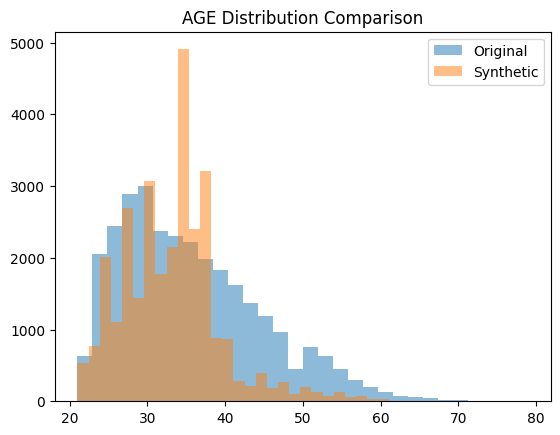

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['AGE'], bins=30, alpha=0.5, label='Original')
plt.hist(synthetic_data['AGE'], bins=30, alpha=0.5, label='Synthetic')
plt.legend()
plt.title('AGE Distribution Comparison')
plt.show()


In [1]:
import pandas as pd
synthetic_data = pd.read_csv('/content/tvae_synthetic.csv', index_col=0)

# Load dataset
train = pd.read_excel("default of credit card clients.xls", header=1)

# Drop the 'ID' column if present
if 'ID' in train.columns:
    train = train.drop(columns=['ID'])

# determine categorical attributes
cat_attrs = ['SEX', 'MARRIAGE','default payment next month']#, 'EDUCATION' , 'AGE', 'PAY0', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6']

int_attrs = ['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# determine numerical attributes
num_attrs = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

num_attrs += int_attrs

print(train.shape)
train.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
pip install sdmetrics sdv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [3]:
from sdv.metadata import SingleTableMetadata
import sdv.evaluation.single_table as sdv_st

In [4]:
# build a metadata for evaluation (from SDV)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train)

# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.32it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 133.43it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



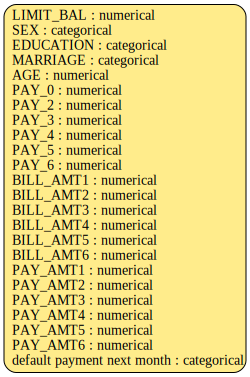

In [5]:
metadata.visualize()

In [6]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,LIMIT_BAL,KSComplement,0.825933
1,SEX,TVComplement,0.710767
2,EDUCATION,TVComplement,0.830733
3,MARRIAGE,TVComplement,0.987433
4,AGE,KSComplement,0.794033
5,PAY_0,KSComplement,0.979667
6,PAY_2,KSComplement,0.984367
7,PAY_3,KSComplement,0.982533
8,PAY_4,KSComplement,0.972267
9,PAY_5,KSComplement,0.959033


In [7]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [8]:
import sdv

for col in num_attrs:
  quality_report = sdv.evaluation.single_table.evaluate_quality(train, synthetic_data, metadata)
  fig = sdv.evaluation.single_table.get_column_plot(
      real_data=train,
      synthetic_data=synthetic_data,
      metadata=metadata,
      column_name=col
  )

  fig.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 59.11it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 137.42it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.75it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 136.39it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 41.42it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 109.88it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 59.49it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 137.18it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.85it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 136.37it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 59.89it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 124.88it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 40.51it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 125.70it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 57.98it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 131.32it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.63it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 134.63it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.03it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 104.06it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 56.11it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 132.75it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 57.04it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 132.15it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 52.77it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 134.47it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 37.01it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 97.44it/s]| 
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 52.78it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 112.70it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 56.23it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 105.77it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 55.89it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:03<00:00, 85.92it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 43.80it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 132.73it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 55.71it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 132.11it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 55.88it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 129.41it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 36.13it/s]|
Column Shapes Score: 90.54%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 107.45it/s]|
Column Pair Trends Score: 85.52%

Overall Score (Average): 88.03%



In [9]:
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import RangeCoverage

for i in num_attrs:
    print(i +  " " +
    str(BoundaryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
       + ", RangeCoverage  " +
          str(RangeCoverage.compute(
              real_data=train[i],
        synthetic_data=synthetic_data[i]
          )) )

LIMIT_BAL 1.0, RangeCoverage  0.5503818181818182
BILL_AMT1 1.0, RangeCoverage  0.6438384165522953
BILL_AMT2 1.0, RangeCoverage  0.7681834056493829
BILL_AMT3 1.0, RangeCoverage  0.3331979028776959
BILL_AMT4 1.0, RangeCoverage  0.6458365125387864
BILL_AMT5 1.0, RangeCoverage  0.684396210231977
BILL_AMT6 1.0, RangeCoverage  0.583084025030989
PAY_AMT1 1.0, RangeCoverage  0.18145113284612713
PAY_AMT2 1.0, RangeCoverage  0.12493981032608403
PAY_AMT3 1.0, RangeCoverage  0.1961887862149011
PAY_AMT4 1.0, RangeCoverage  0.22919001610305956
PAY_AMT5 1.0, RangeCoverage  0.2949647034550992
PAY_AMT6 1.0, RangeCoverage  0.5077818509228889
EDUCATION 1.0, RangeCoverage  0.33333333333333337
AGE 1.0, RangeCoverage  0.7413793103448276
PAY_0 1.0, RangeCoverage  0.6
PAY_2 1.0, RangeCoverage  0.6
PAY_3 1.0, RangeCoverage  0.6
PAY_4 1.0, RangeCoverage  0.6
PAY_5 1.0, RangeCoverage  0.5
PAY_6 1.0, RangeCoverage  0.5


In [10]:
from sdmetrics.single_column import CategoryAdherence
from sdmetrics.single_column import CategoryCoverage

for i in cat_attrs:
    print(i +  " CategoryAdherence" +
    str(CategoryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
    + ", CategoryCoverage : " + str(CategoryCoverage.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    )))


SEX CategoryAdherence1.0, CategoryCoverage : 1.0
MARRIAGE CategoryAdherence1.0, CategoryCoverage : 0.5
default payment next month CategoryAdherence1.0, CategoryCoverage : 1.0


In [11]:
from sklearn.model_selection import train_test_split

train_, test = train_test_split(train, test_size=0.3, random_state=42)

In [12]:
'''
Compute Utility Score
'''

from sdmetrics.single_table import  BinaryDecisionTreeClassifier

synthetic_data_f1 = BinaryDecisionTreeClassifier.compute(
    test_data=test,
    train_data=synthetic_data,
    target='default payment next month',
    metadata=metadata.to_dict()
)

real_data_f1 = BinaryDecisionTreeClassifier.compute(
    test_data=test,
    train_data=train_,
    target='default payment next month',
    metadata=metadata.to_dict()
)

print(f'Utility Score: {min(synthetic_data_f1/real_data_f1 , 1)}')

Utility Score: 1


In [17]:
real_data_f1

0.47041230506302073

In [13]:
from sdmetrics.single_table import DCRBaselineProtection

privacy = DCRBaselineProtection.compute_breakdown(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    num_rows_subsample = 100,
    num_iterations =50
)
print(f'Privacy Score: {privacy["score"]}')

Privacy Score: 0.08299600720958977


In [14]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3000
)

1.0

In [ ]:
synthetic_data.to_csv('tvae_synthetic.csv')

In [ ]:
import pickle

with open('tvae_model.pkl', 'wb') as f:
  pickle.dump(tvae, f)